# Beta Basian Stuff
This notebook is going to try to modify Binary_Fraction Mainly the detection process to do a Bassian aprouch to things

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%run BinaryDataClean3.py
Tables = BinaryDataClean3('/home/cody/Binary Search/2nd_Data_Set/mc_rgb_nocuts.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')

In [5]:
AllAvg, AllVis, ISO = Tables.get_data()
AllVis = Tables.cuts(AllVis)
AllAvg = Tables.nvisits_cut(AllAvg,5)
AAS_RG = Tables.rg_cut(AllAvg)

In [6]:
AAS_RG_T = Tables.troup_fits(AAS_RG)
AAS_RG_T = Tables.troup_errors(AAS_RG_T)

In [7]:
AAS_RG_IT = Tables.iso_fit(AAS_RG_T,ISO)

Done with 0.000000
No good fits in 3 sigma of erros. Star 2M05140287-7214484, row 16
No good fits in 3 sigma of erros. Star 2M05205391-7259483, row 87
No good fits in 3 sigma of erros. Star 2M05214222-7227340, row 98
Done with 100.000000
No good fits in 3 sigma of erros. Star 2M05215411-7316058, row 103
No good fits in 3 sigma of erros. Star 2M05235220-7216056, row 124
Done with 200.000000
No good fits in 3 sigma of erros. Star 2M04570693-7129288, row 250
No good fits in 3 sigma of erros. Star 2M05010386-7102238, row 300
No good fits in 3 sigma of erros. Star 2M06261934-7011104, row 370
No good fits in 3 sigma of erros. Star 2M06281846-7008537, row 400
No good fits in 3 sigma of erros. Star 2M06320563-7050235, row 451
No good fits in 3 sigma of erros. Star 2M06354972-6957575, row 488
No good fits in 3 sigma of erros. Star 2M06390106-7040477, row 500
No good fits in 3 sigma of erros. Star 2M05185026-7556305, row 510
No good fits in 3 sigma of erros. Star 2M05221955-7617219, row 529
No g

In [8]:
AAS_RV_IT = Tables.rv_table_add(AAS_RG_IT, AllVis)

In [9]:
AllAvg_LMC_IT = Tables.mc_cut(AAS_RV_IT, 'L')
AllAvg_SMC_IT = Tables.mc_cut(AAS_RV_IT, 'S')

In [10]:
AllAvg_SMC=Tables.Table_Convert(AllAvg_SMC_IT)
AllAvg_LMC=Tables.Table_Convert(AllAvg_LMC_IT)

In [16]:
%run BinaryFraction2.py

In [17]:
thing_LMC2 = BinaryFraction2(AllAvg_LMC)
thing_SMC2 = BinaryFraction2(AllAvg_SMC)

In [18]:
#synthetic_rates = [p_value_result_LMC, binary_result_LMC,  detection_rate_LMC, errors_LMC]
synthetic_rates_LMC2 = thing_LMC2.synthetic_detection_rate(200,['L',3,2.5],False,[0,1],2)
#synthetic_rates_LMC = thing_LMC.synthetic_detection_rate(200,'L',True,False, [0,1],2)
synthetic_rates_SMC2 = thing_SMC2.synthetic_detection_rate(200,['L',3,2.5],False,[0,1],2)

In [14]:
#real_data = [real_data_detection_LMC_5, binary_bool_LMC_5, LMC_binary_detection_5, rd_err_LMC]
real_data_LMC2 = thing_LMC2.Real_Data_Fraction()
real_data_SMC2 = thing_SMC2.Real_Data_Fraction()

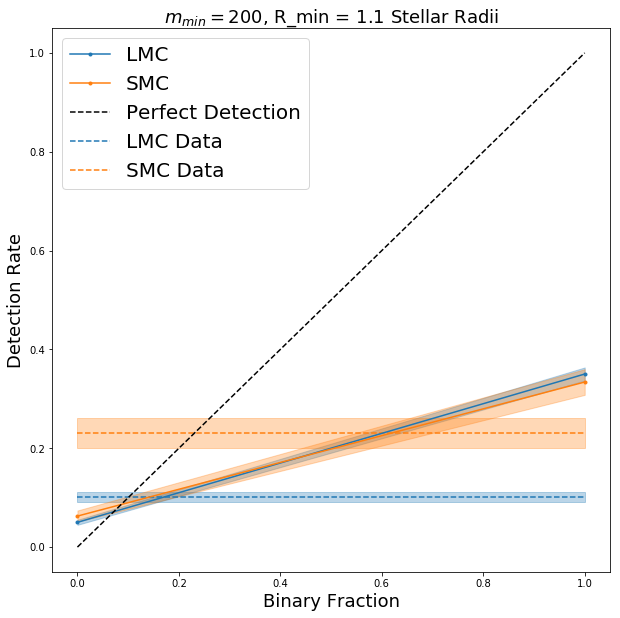

In [20]:
plt.figure(figsize = (10,10))
b_frac = [0,1]
plt.plot(b_frac, synthetic_rates_LMC2[2],'.-', color = 'C0', label = 'LMC')
plt.hlines(real_data_LMC2[2], 0 ,1, color = 'C0', linestyles='dashed', label = 'LMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_LMC2[3][0][1], synthetic_rates_LMC2[3][1][1]],
                 [synthetic_rates_LMC2[3][0][0], synthetic_rates_LMC2[3][1][0]],
                 alpha = 0.3, color = 'C0')
plt.fill_between([0,1], real_data_LMC2[3][0][0], real_data_LMC2[3][0][1], alpha = 0.3, color = 'C0')

#plt.plot(b_frac, detection_rate_SMC, '.-', color = 'C1', label = 'SMC')
#plt.hlines(SMC_binary_detection_5, 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
#plt.fill_between([0,1], [errors_SMC[0][1],errors_SMC[1][1]], [errors_SMC[0][0], errors_SMC[1][0]], alpha = 0.3, color = 'C1')
#plt.fill_between([0,1], rd_err_SMC[0][0], rd_err_SMC[0][1], alpha = 0.3, color = 'C1')
plt.plot(b_frac, synthetic_rates_SMC2[2],'.-', color = 'C1', label = 'SMC')
plt.hlines(real_data_SMC2[2], 0 ,1, color = 'C1', linestyles='dashed', label = 'SMC Data')
plt.fill_between([0,1],
                 [synthetic_rates_SMC2[3][0][1], synthetic_rates_SMC2[3][1][1]],
                 [synthetic_rates_SMC2[3][0][0], synthetic_rates_SMC2[3][1][0]],
                 alpha = 0.3, color = 'C1')
plt.fill_between([0,1], real_data_SMC2[3][0][0], real_data_SMC2[3][0][1], alpha = 0.3, color = 'C1')

plt.plot([0,1],[0,1],'--', color = 'black',label = 'Perfect Detection')
plt.xlabel('Binary Fraction', size = 18)
plt.ylabel('Detection Rate', size = 18)
plt.title('$m_{min} = 200$, R_min = 1.1 Stellar Radii', size = 18)
plt.legend(prop = {'size': 20})
plt.show()

# Baysian Stuff
Trying out the basian method in the Specer papter. 

In [27]:
beta = thing_LMC2.BetaMaster(100, ['L', 3.8, 2.23], True, 1, 10)

In [83]:
%%time 
binary_fraction = [0,]
bins = np.arange(0,10,1)
beta_dict = {x:[] for x in bins} # Adds one too many entries but don't feel like dealing wtih it
loop = 0
while loop < 2000:
    for bf in binary_fraction:
        beta = thing_LMC2.BetaMaster(100, ['L', 3.8, 2.23], True, bf, 1)
        beta = [b if b < 9 else 8.5 for b in beta] # Anything too large lump it into the largest bin
        beta_hist = np.histogram(beta, bins = bins)
        for n in range(9):
            beta_dict[beta_hist[1][n]].append(beta_hist[0][n])
    loop += 1

CPU times: user 6min 41s, sys: 828 ms, total: 6min 42s
Wall time: 6min 41s


In [79]:
beta_dict

{0: [16302, 16383, 16232, 16391, 16213, 16110, 16298, 16113, 16279, 16344],
 1: [6467, 6487, 6474, 6432, 6591, 6635, 6480, 6552, 6461, 6466],
 2: [1027, 935, 1070, 980, 1009, 1050, 1019, 1109, 1055, 981],
 3: [62, 54, 82, 55, 45, 64, 62, 85, 63, 66],
 4: [1, 0, 1, 1, 1, 0, 0, 0, 1, 2],
 5: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 6: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 7: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 8: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 9: []}

(array([  2.,   1.,  47., 198., 434., 527., 469., 230.,  77.,  15.]),
 array([15814. , 15898.6, 15983.2, 16067.8, 16152.4, 16237. , 16321.6,
        16406.2, 16490.8, 16575.4, 16660. ]),
 <a list of 10 Patch objects>)

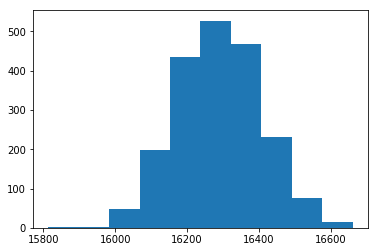

In [84]:
plt.hist(beta_dict[0])

(array([16273.,  6525.,  1004.,    57.,     0.,     0.,     0.,     0.,
            0.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

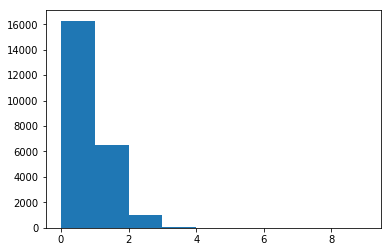

In [55]:
plt.hist(beta,bins = bins)

In [30]:
np.histogram(beta, bins = bins)

(array([80562, 64150, 40726, 20766,  9299,  3966,  2065,  1419,  1058,
          920,   773,   722,   617,   586,   481,   454,   439,   392,
          339]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5]))

(array([1., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5]),
 <a list of 19 Patch objects>)

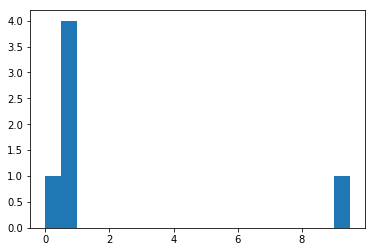

In [38]:
foo = [0.5,0.5,0.5,0.6,0.4,9.5]
plt.hist(foo, bins = bins)